In [ ]:
import numpy as np
import pandas as pd
import os
import time
import yfinance as yf
from matplotlib import pyplot as plt

# Data

## Importing minute-level trading data data


In [ ]:
# Define time range
start_time = pd.to_datetime('2024-02-27')
end_time = pd.to_datetime('2024-03-27')

# Use timedelta to increment time in the loop
delta = pd.DateOffset(days=7)

# Initialize an empty list to store data frames
data_frames = []

# Loop through the time range
current_time = start_time
while current_time <= end_time:
    next_time = current_time + delta
    if next_time > end_time:
        next_time = end_time

    # Use yfinance to download minute-level trading data
    try:
        data = yf.download('^HSI', start=current_time, end=next_time, interval='1m')
        data_frames.append(data)
    except Exception as e:
        print(f"Failed to download data for {current_time} to {next_time}: {e}")

    current_time = next_time + pd.DateOffset(days=1)

# Concatenate data frames
merged_data = pd.concat(data_frames)

merged_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-02-27 09:30:00+08:00,16645.630859,16645.630859,16565.740234,16582.089844,16582.089844,0
2024-02-27 09:31:00+08:00,16584.359375,16640.109375,16584.359375,16640.109375,16640.109375,0
2024-02-27 09:32:00+08:00,16641.439453,16657.060547,16641.439453,16649.810547,16649.810547,0
2024-02-27 09:33:00+08:00,16648.359375,16653.029297,16632.099609,16644.289062,16644.289062,0
2024-02-27 09:34:00+08:00,16642.900391,16646.810547,16633.500000,16643.949219,16643.949219,0
...,...,...,...,...,...,...
2024-03-26 16:05:00+08:00,16616.130859,16616.130859,16616.130859,16616.130859,16616.130859,0
2024-03-26 16:06:00+08:00,16616.130859,16616.130859,16616.130859,16616.130859,16616.130859,0
2024-03-26 16:07:00+08:00,16616.130859,16616.130859,16616.130859,16616.130859,16616.130859,0


## Visualization

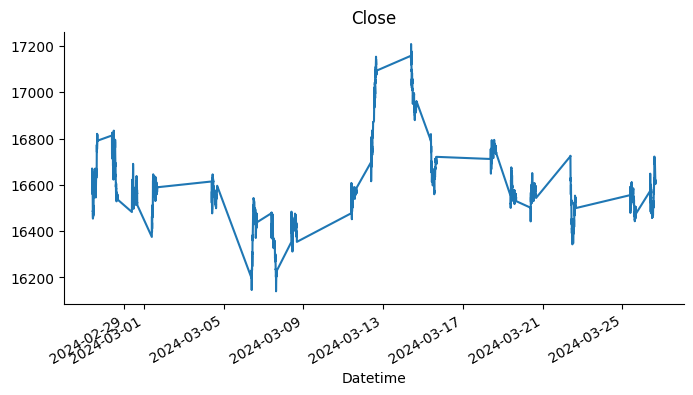

In [ ]:
merged_data['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

## Divided into 20 days and 10 days


In [ ]:
split_index = int(len(merged_data) * 0.7)

20days_data = merged_data.iloc[:split_index]
10days_data = merged_data.iloc[split_index:]

In [ ]:
20days_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-02-27 09:30:00+08:00,16645.630859,16645.630859,16565.740234,16582.089844,16582.089844,0
2024-02-27 09:31:00+08:00,16584.359375,16640.109375,16584.359375,16640.109375,16640.109375,0
2024-02-27 09:32:00+08:00,16641.439453,16657.060547,16641.439453,16649.810547,16649.810547,0
2024-02-27 09:33:00+08:00,16648.359375,16653.029297,16632.099609,16644.289062,16644.289062,0
2024-02-27 09:34:00+08:00,16642.900391,16646.810547,16633.500000,16643.949219,16643.949219,0
...,...,...,...,...,...,...
2024-03-18 13:48:00+08:00,16765.849609,16769.699219,16763.939453,16767.660156,16767.660156,0
2024-03-18 13:49:00+08:00,16769.300781,16773.419922,16765.820312,16771.259766,16771.259766,0
2024-03-18 13:50:00+08:00,16770.669922,16775.179688,16769.890625,16769.890625,16769.890625,0


In [ ]:
10days_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-03-18 13:53:00+08:00,16760.189453,16762.230469,16755.750000,16758.250000,16758.250000,0
2024-03-18 13:54:00+08:00,16758.089844,16762.380859,16754.630859,16761.070312,16761.070312,0
2024-03-18 13:55:00+08:00,16762.589844,16768.009766,16760.369141,16762.250000,16762.250000,0
2024-03-18 13:56:00+08:00,16762.089844,16770.609375,16762.089844,16770.609375,16770.609375,0
2024-03-18 13:57:00+08:00,16769.009766,16774.060547,16766.410156,16768.560547,16768.560547,0
...,...,...,...,...,...,...
2024-03-26 16:05:00+08:00,16616.130859,16616.130859,16616.130859,16616.130859,16616.130859,0
2024-03-26 16:06:00+08:00,16616.130859,16616.130859,16616.130859,16616.130859,16616.130859,0
2024-03-26 16:07:00+08:00,16616.130859,16616.130859,16616.130859,16616.130859,16616.130859,0


## Data download

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
20days_data.to_csv('/content/drive/MyDrive/CDS 521 AI/20days_data.csv')
10days_data.to_csv('/content/drive/MyDrive/CDS 521 AI/10days_data.csv')



Mounted at /content/drive/
